In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import xarray as xr
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt

from disp_xr.log.logging import setup_logging
from disp_xr import product, quality_metrics, utils, stack as st
from disp_xr.io import write_geotiff, get_geospatial_info

logger = logging.getLogger('disp_xr')
setup_logging(logger_name='disp_xr')

In [24]:
import pandas as pd
def plot_date1_date2(ax, df):
    # Convert date1 and date2 to datetime format
    df = df.copy()
    df["date1"] = pd.to_datetime(df["date1"], format="%Y%m%d")
    df["date2"] = pd.to_datetime(df["date2"], format="%Y%m%d")
    
    # Plot
    ax.scatter(df.date1, df.date2, alpha=0.7, marker="o", color="b")
    
    # Labels and title
    ax.set_xlabel("Date1 (Start Date)")
    ax.set_ylabel("Date2 (End Date)")
    ax.set_title("Date1 vs. Date2")
    ax.grid(True)


# F8622

In [59]:
# Get DISP version 0.9 data
disp_df = product.get_disp_info('/u/duvel-d2/govorcin/NJ/ASC/v1.1/8622')

[INFO|product|L23] 2025-02-21T15:27:27-0800: Found OPERA DISP: 687 products
[INFO|product|L42] 2025-02-21T15:27:28-0800:  Starting date: 2016-07-16 22:50:42
[INFO|product|L43] 2025-02-21T15:27:28-0800:  Ending date: 2024-12-13 22:51:21
[INFO|product|L46] 2025-02-21T15:27:28-0800:  Number of reference dates: 24
[INFO|product|L84] 2025-02-21T15:27:28-0800:  Skip 203 duplicates


In [60]:
if disp_df.version.unique().size >1:
    raise ValueError('Multiple versions found in DISP data. Please filter to a single version.')

ValueError: Multiple versions found in DISP data. Please filter to a single version.

In [61]:
versions = {}
for v in disp_df.version.unique():
    versions[v] = disp_df[disp_df.version == v].copy()
    print(f'{v}, size: {versions[v].shape[0]}')

v1.1, size: 239
v1.0, size: 208
v0.8, size: 21


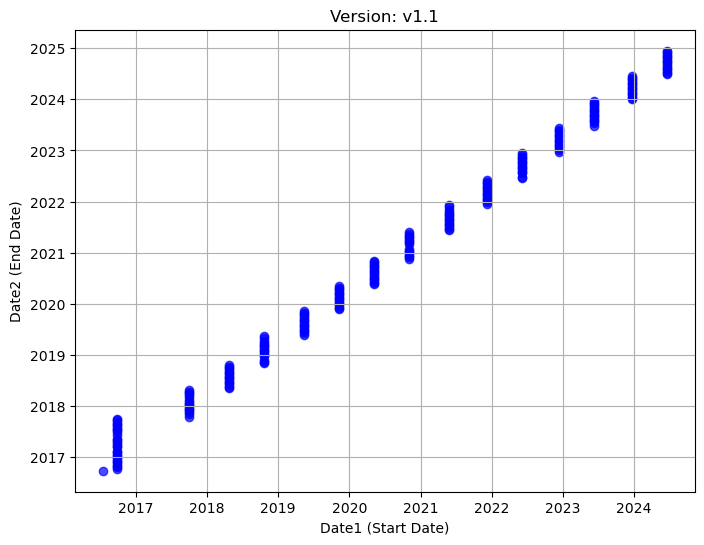

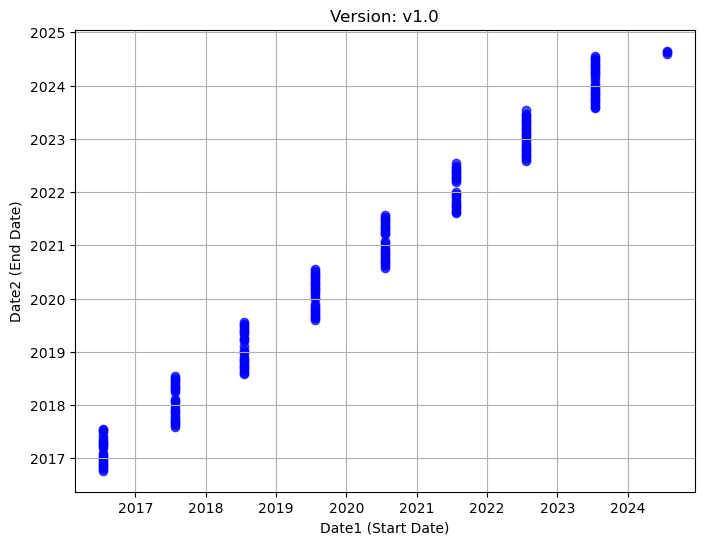

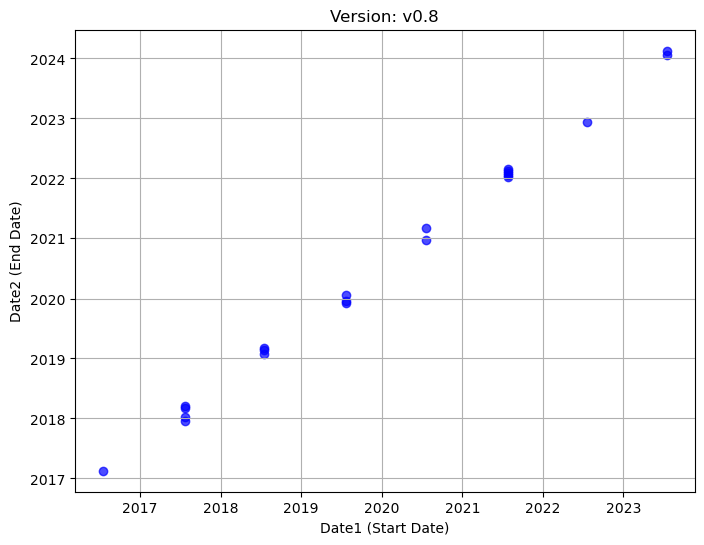

In [62]:
for key, df in versions.items():
    fig, ax = plt.subplots(figsize=(8, 6))
    plot_date1_date2(ax, df)
    ax.set_title(f'Version: {key}') 

Text(0.5, 0.98, 'F8622')

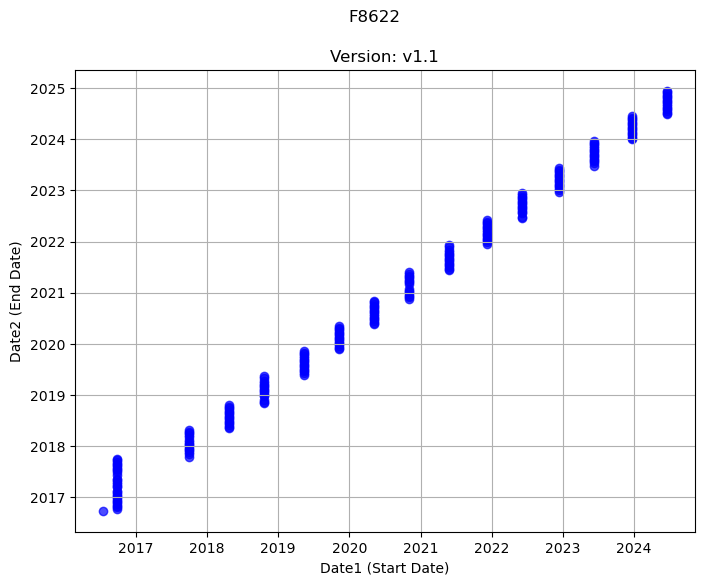

In [63]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_date1_date2(ax, versions['v1.1'])
ax.set_title(f'Version: {'v1.1'}') 
fig.suptitle("F8622")

In [70]:
d = versions['v1.1'].groupby(by='date1').apply(lambda x: x)

/tmp/ipykernel_24258/3249567034.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  d = versions['v1.1'].groupby(by='date1').apply(lambda x: x)


In [77]:
d.groupby(level=0).size()

date1
20160716     1
20160926    28
20171003    15
20180425    15
20181022    15
20190514    15
20191110    15
20200508    15
20201104    15
20210527    15
20211205    15
20220603    15
20221212    15
20230610    15
20231219    15
20240616    15
dtype: int64

# F8621

In [78]:
# Get DISP version 0.9 data
disp_df = product.get_disp_info('/u/duvel-d2/govorcin/NJ/ASC/v1.1/8621')

if disp_df.version.unique().size >1:
    raise ValueError('Multiple versions found in DISP data. Please filter to a single version.')

[INFO|product|L23] 2025-02-21T15:32:20-0800: Found OPERA DISP: 224 products
[INFO|product|L42] 2025-02-21T15:32:20-0800:  Starting date: 2017-02-17 22:50:28
[INFO|product|L43] 2025-02-21T15:32:20-0800:  Ending date: 2024-10-26 22:51:10
[INFO|product|L46] 2025-02-21T15:32:20-0800:  Number of reference dates: 15
[INFO|product|L84] 2025-02-21T15:32:20-0800:  Skip 0 duplicates


In [79]:
versions = {}
for v in disp_df.version.unique():
    versions[v] = disp_df[disp_df.version == v].copy()
    print(f'{v}, size: {versions[v].shape[0]}')

v1.1, size: 224


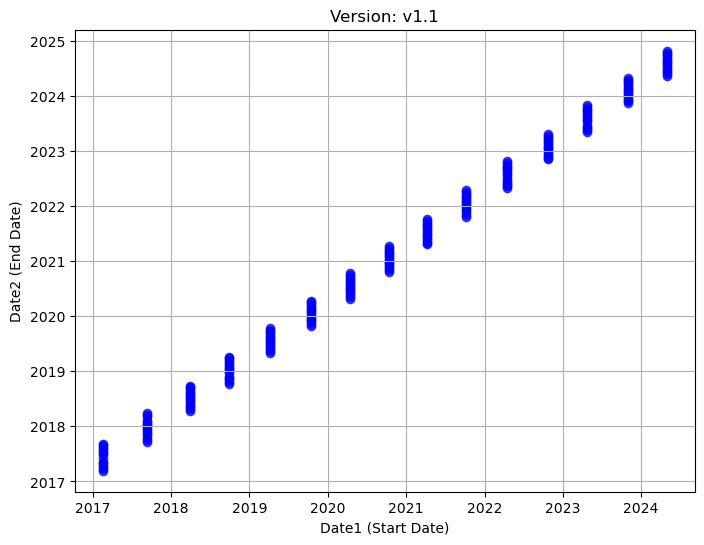

In [80]:
for key, df in versions.items():
    fig, ax = plt.subplots(figsize=(8, 6))
    plot_date1_date2(ax, df)
    ax.set_title(f'Version: {key}') 

Text(0.5, 0.98, 'F8621')

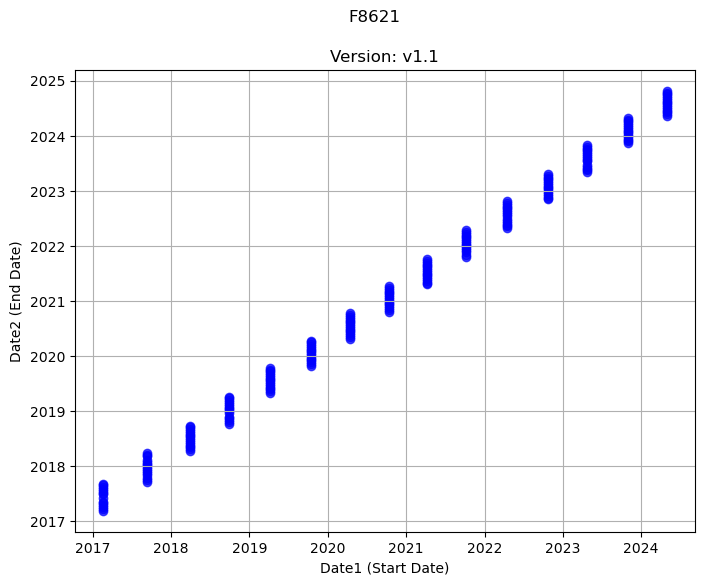

In [81]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_date1_date2(ax, versions['v1.1'])
ax.set_title(f'Version: {'v1.1'}') 
fig.suptitle("F8621")

In [82]:
d = versions['v1.1'].groupby(by='date1').apply(lambda x: x)
d.groupby(level=0).size()

/tmp/ipykernel_24258/936273846.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  d = versions['v1.1'].groupby(by='date1').apply(lambda x: x)


date1
20170217    14
20170909    15
20180401    15
20180928    15
20190408    15
20191017    15
20200414    15
20201011    15
20210409    15
20211006    15
20220416    15
20221025    15
20230423    15
20231101    15
20240429    15
dtype: int64

# 28220

In [83]:
# Get DISP version 0.9 data
disp_df = product.get_disp_info('/u/duvel-d2/govorcin/NJ/ASC/v1.1/28220')

if disp_df.version.unique().size >1:
    raise ValueError('Multiple versions found in DISP data. Please filter to a single version.')

[INFO|product|L23] 2025-02-21T15:33:41-0800: Found OPERA DISP: 239 products
[INFO|product|L42] 2025-02-21T15:33:41-0800:  Starting date: 2016-07-09 22:58:15
[INFO|product|L43] 2025-02-21T15:33:41-0800:  Ending date: 2024-09-13 22:58:56
[INFO|product|L46] 2025-02-21T15:33:41-0800:  Number of reference dates: 16
[INFO|product|L84] 2025-02-21T15:33:41-0800:  Skip 0 duplicates


v1.1, size: 239


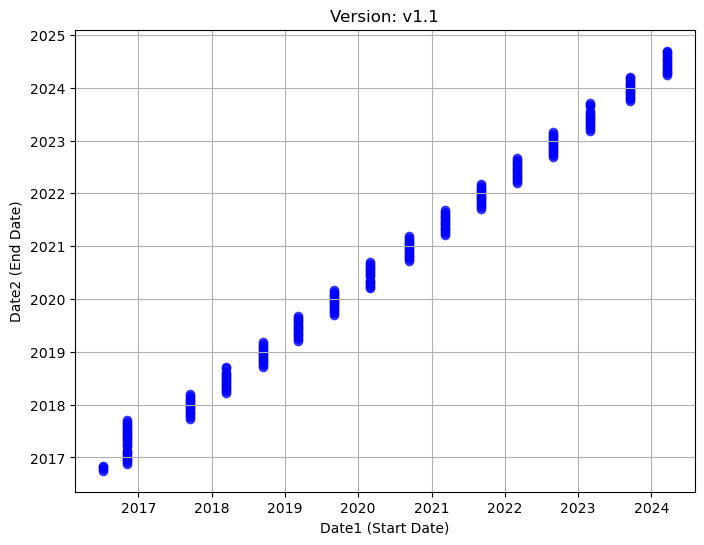

In [84]:
versions = {}
for v in disp_df.version.unique():
    versions[v] = disp_df[disp_df.version == v].copy()
    print(f'{v}, size: {versions[v].shape[0]}')

for key, df in versions.items():
    fig, ax = plt.subplots(figsize=(8, 6))
    plot_date1_date2(ax, df)
    ax.set_title(f'Version: {key}') 

Text(0.5, 0.98, 'F28220')

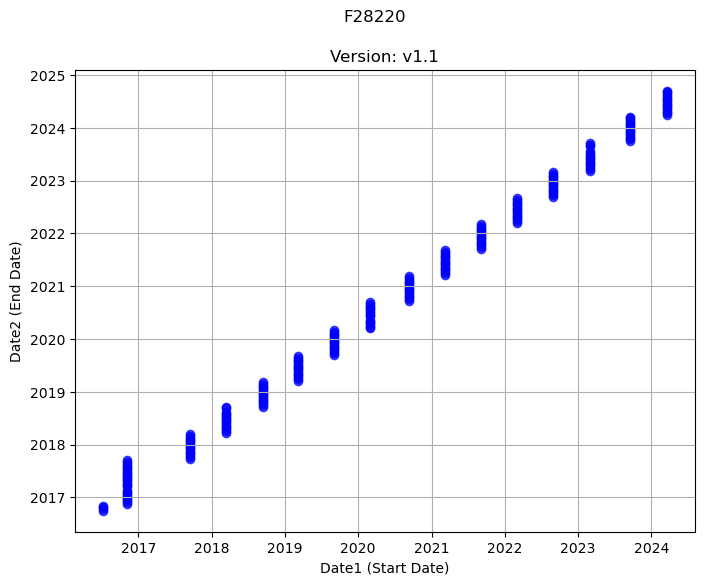

In [85]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_date1_date2(ax, versions['v1.1'])
ax.set_title(f'Version: {'v1.1'}') 
fig.suptitle("F28220")

In [86]:
d = versions['v1.1'].groupby(by='date1').apply(lambda x: x)
d.groupby(level=0).size()

/tmp/ipykernel_24258/936273846.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  d = versions['v1.1'].groupby(by='date1').apply(lambda x: x)


date1
20160709     4
20161106    25
20170914    15
20180313    15
20180915    15
20190308    15
20190904    15
20200302    15
20200910    15
20210309    15
20210905    15
20220304    15
20220831    15
20230227    15
20230919    15
20240317    15
dtype: int64

# 28221

In [87]:
# Get DISP version 0.9 data
disp_df = product.get_disp_info('/u/duvel-d2/govorcin/NJ/ASC/v1.1/28221')

if disp_df.version.unique().size >1:
    raise ValueError('Multiple versions found in DISP data. Please filter to a single version.')

[INFO|product|L23] 2025-02-21T15:33:58-0800: Found OPERA DISP: 239 products
[INFO|product|L42] 2025-02-21T15:33:58-0800:  Starting date: 2016-07-09 22:58:37
[INFO|product|L43] 2025-02-21T15:33:58-0800:  Ending date: 2024-10-19 22:59:19
[INFO|product|L46] 2025-02-21T15:33:58-0800:  Number of reference dates: 16
[INFO|product|L84] 2025-02-21T15:33:58-0800:  Skip 0 duplicates


v1.1, size: 239


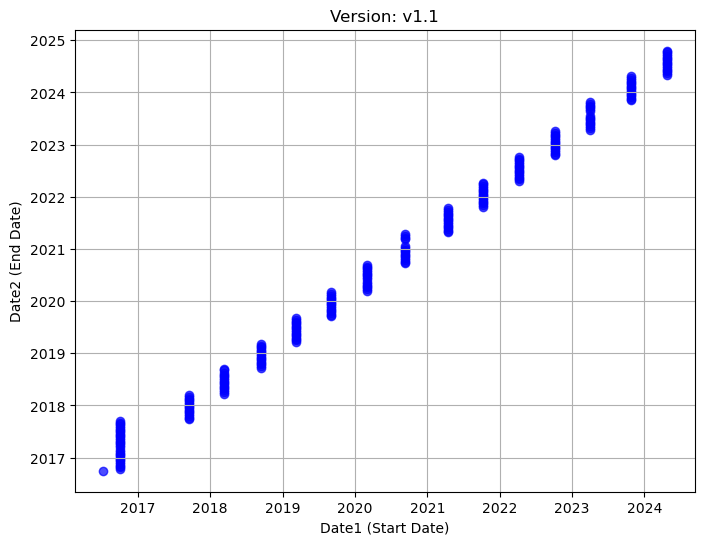

In [88]:
versions = {}
for v in disp_df.version.unique():
    versions[v] = disp_df[disp_df.version == v].copy()
    print(f'{v}, size: {versions[v].shape[0]}')

for key, df in versions.items():
    fig, ax = plt.subplots(figsize=(8, 6))
    plot_date1_date2(ax, df)
    ax.set_title(f'Version: {key}') 

Text(0.5, 0.98, 'F28221')

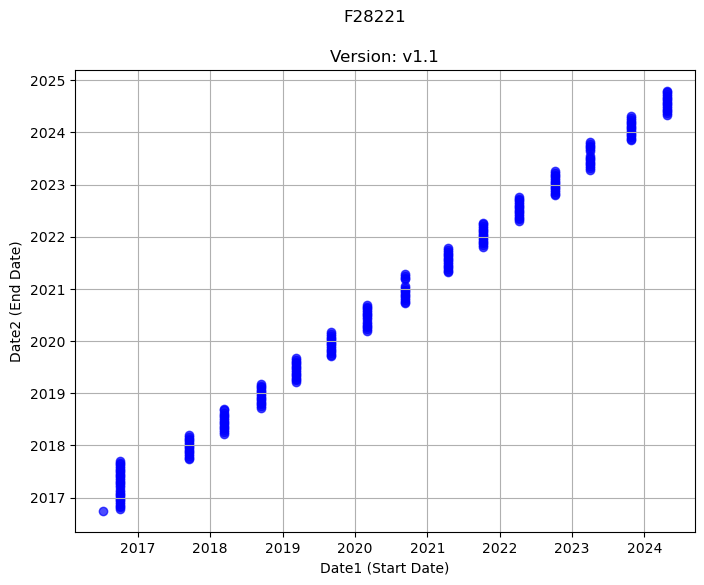

In [89]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_date1_date2(ax, versions['v1.1'])
ax.set_title(f'Version: {'v1.1'}') 
fig.suptitle("F28221")

In [90]:
d = versions['v1.1'].groupby(by='date1').apply(lambda x: x)
d.groupby(level=0).size()

/tmp/ipykernel_24258/936273846.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  d = versions['v1.1'].groupby(by='date1').apply(lambda x: x)


date1
20160709     1
20161001    28
20170914    15
20180313    15
20180915    15
20190308    15
20190904    15
20200302    15
20200910    15
20210414    15
20211011    15
20220409    15
20221006    15
20230404    15
20231025    15
20240422    15
dtype: int64

# 28222

In [91]:
# Get DISP version 0.9 data
disp_df = product.get_disp_info('/u/duvel-d2/govorcin/NJ/ASC/v1.1/28222')

if disp_df.version.unique().size >1:
    raise ValueError('Multiple versions found in DISP data. Please filter to a single version.')

[INFO|product|L23] 2025-02-21T15:34:11-0800: Found OPERA DISP: 224 products
[INFO|product|L42] 2025-02-21T15:34:11-0800:  Starting date: 2016-07-09 22:58:59
[INFO|product|L43] 2025-02-21T15:34:11-0800:  Ending date: 2024-07-27 22:59:39
[INFO|product|L46] 2025-02-21T15:34:11-0800:  Number of reference dates: 15
[INFO|product|L84] 2025-02-21T15:34:11-0800:  Skip 0 duplicates


v1.1, size: 224


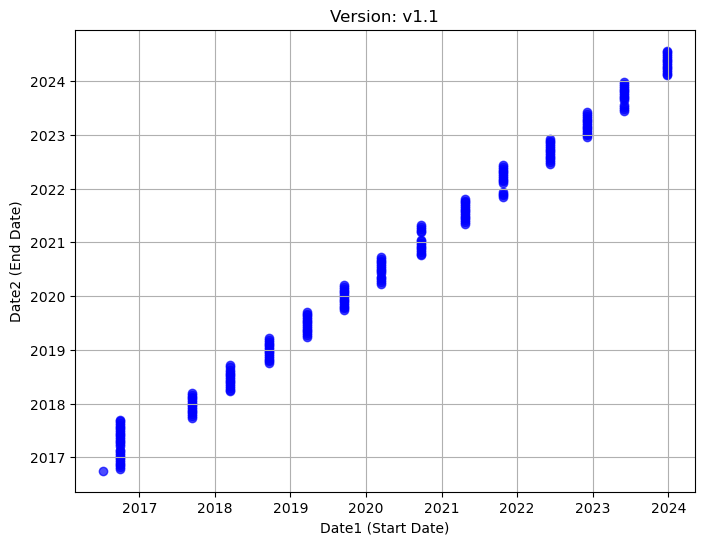

In [92]:
versions = {}
for v in disp_df.version.unique():
    versions[v] = disp_df[disp_df.version == v].copy()
    print(f'{v}, size: {versions[v].shape[0]}')

for key, df in versions.items():
    fig, ax = plt.subplots(figsize=(8, 6))
    plot_date1_date2(ax, df)
    ax.set_title(f'Version: {key}') 

Text(0.5, 0.98, 'F28222')

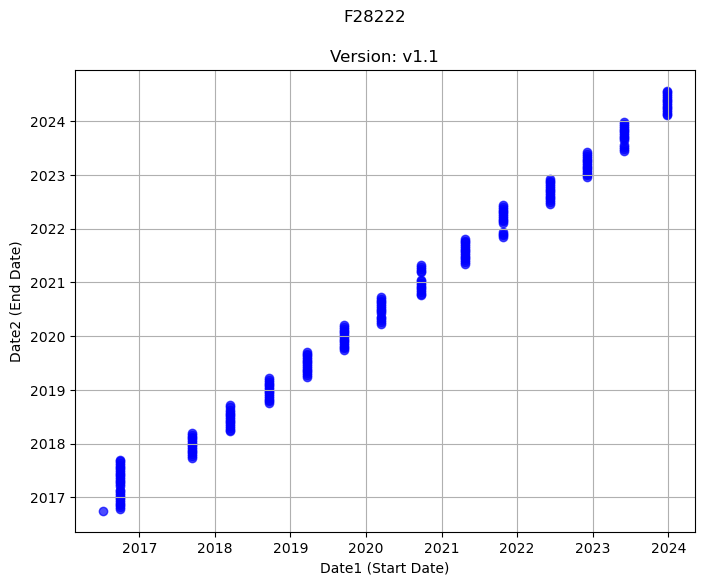

In [93]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_date1_date2(ax, versions['v1.1'])
ax.set_title(f'Version: {'v1.1'}') 
fig.suptitle("F28222")

In [94]:
d = versions['v1.1'].groupby(by='date1').apply(lambda x: x)
d.groupby(level=0).size()

/tmp/ipykernel_24258/936273846.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  d = versions['v1.1'].groupby(by='date1').apply(lambda x: x)


date1
20160709     1
20161001    28
20170914    15
20180313    15
20180921    15
20190320    15
20190916    15
20200314    15
20200922    15
20210426    15
20211023    15
20220608    15
20221205    15
20230603    15
20231224    15
dtype: int64